In [ ]:
import matplotlib.pyplot as plt

## Open up a terminal, connect to the BioE131 server, and locate the data

`cd /`  
`cp data/Lab6_data/mixed_reads1.fastq home/5442778/bioe131/labs/lab6/data/mixed_reads1.fastq`  
`cp data/Lab6_data/mixed_reads2.fastq home/5442778/bioe131/labs/lab6/data/mixed_reads2.fastq`  
`cd /home/5442778/bioe131/labs/lab6`  
`cp /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1.{1..4}.bt2 ./data/`  
`cp /data/references/shewanella_oneidensis_mr-1/shewanella_oneidensis_mr-1.rev.{1..2}.bt2 ./data/`  
`cp /data/references/hg19/hg19.{1..4}.bt2 ./data`  
`cp /data/references/hg19/hg19.rev.{1..2}.bt2 ./data`  


`bowtie2 -p 4 --very-fast --no-unal -x data/hg19 -U data/mixed_reads1.fastq -S output_data/human_aligned_mixed_reads1.sam --un output_data/human_unaligned_mixed_reads1.fastq`  
Output:  
`1285441 reads; of these:`  
`__1285441 (100.00%) were unpaired; of these:`  
`____1030006 (80.13%) aligned 0 times`  
`____234344 (18.23%) aligned exactly 1 time`  
`____21091 (1.64%) aligned >1 times`  
`19.87% overall alignment rate` 

` bowtie2 -p 4 --very-fast --no-unal -x data/hg19 -U data/mixed_reads2.fastq -S output_data/human_aligned_mixed_reads2.sam --un output_data/human_unaligned_mixed_reads2.fastq`  
Output:  
`1285441 reads; of these:`  
`__1285441 (100.00%) were unpaired; of these:`  
`____1030191 (80.14%) aligned 0 times`  
`____234139 (18.21%) aligned exactly 1 time`  
`____21111 (1.64%) aligned >1 times`  
`19.86% overall alignment rate`  

### Answers to questions

For the database for aligning the reads to the human genome, I used hg19 as the database, since is is already indexed for me.  
If I use the --un option, then bowtie2 will write the reads that don't align to the database to the file that I specify. This means that this file can then be used to just get the reads that aren't of humans, and of the genome of interest.

It seems that approximately 19.9865 percent of reads came from contaminating human DNA.


## Align the reads to the S. Oneidensis reference genome

`bowtie2 -p 4 --very-fast --no-unal -x data/shewanella_oneidensis_mr-1 -U output_data/human_unaligned_mixed_reads1.fastq -S output_data/oneidensis_aligned_mixed_reads1.sam --un output_data/oneidensis_unaligned_mixed_reads1.fastq`  
Output:  
`1030006 reads; of these:`  
`__1030006 (100.00%) were unpaired; of these:`  
`____268017 (26.02%) aligned 0 times`  
`____710825 (69.01%) aligned exactly 1 time`  
`____51164 (4.97%) aligned >1 times`  
`73.98% overall alignment rate`  

`bowtie2 -p 4 --very-fast --no-unal -x data/shewanella_oneidensis_mr-1 -U output_data/human_unaligned_mixed_reads2.fastq -S output_data/oneidensis_aligned_mixed_reads2.sam --un output_data/oneidensis_unaligned_mixed_reads2.fastq`  
`1030191 reads; of these:`  
`__1030191 (100.00%) were unpaired; of these:`  
`____465755 (45.21%) aligned 0 times`  
`____528050 (51.26%) aligned exactly 1 time`  
`____36386 (3.53%) aligned >1 times`  
`54.79% overall alignment rate`  


### Answers to questions

If I used the unaligned option, then the output unaligned file will contain the strands of DNA that are neither from the human genome nor from S. Oneidensis. These would be other contaminants, such as bacterial DNA.

A total of 761989 +  564536 = 1326425 reads out of 2060197 yields a percentage match of 64.383 percent.

When using --very-sensitive:

`bowtie2 -p 4 --very-sensitive --no-unal -x data/shewanella_oneidensis_mr-1 -U output_data/human_unaligned_mixed_reads1.fastq -S output_data/oneidensis_aligned_mixed_reads1_sensitive.sam --un output_data/oneidensis_unaligned_mixed_reads1_sensitive.fastq && bowtie2 -p 4 --very-sensitive --no-unal -x data/shewanella_oneidensis_mr-1 -U output_data/human_unaligned_mixed_reads2.fastq -S output_data/oneidensis_aligned_mixed_reads2_sensitive.sam --un output_data/oneidensis_unaligned_mixed_reads2_sensitive.fastq`  
Output:  
`1030006 reads; of these:`  
`__1030006 (100.00%) were unpaired; of these:`  
`____266514 (25.87%) aligned 0 times`  
`____711311 (69.06%) aligned exactly 1 time`  
`____52181 (5.07%) aligned >1 times`  
`74.13% overall alignment rate`  
`1030191 reads; of these:`  
`__1030191 (100.00%) were unpaired; of these:`  
`____462099 (44.86%) aligned 0 times`  
`____530858 (51.53%) aligned exactly 1 time`  
`____37234 (3.61%) aligned >1 times`  
`55.14% overall alignment rate`  

The alignment rate goes up if I use very sensitive.

In order to match what the assignment said, I put together the two human_unaligned_mixed_reads into one file, via:  
`cat data/human_unaligned_mixed_reads1.fastq data/human)unaligned_mixed_reads2.fastq > data/human_unaligned_mixed_reads.fastq`.  
Then I ran the program again to get the output from this combined file.

`bowtie2 -p 4 --very-sensitive --no-unal -x data/shewanella_oneidensis_mr-1 -U output_data/human_unaligned_mixed_reads.fastq -S output_data/oneidensis_aligned_mixed_reads.sam --un output_data/oneidensis_unaligned_mixed_reads.fastq`  
`2060197 reads; of these:`  
`__2060197 (100.00%) were unpaired; of these:`  
`____728613 (35.37%) aligned 0 times`  
`____1242169 (60.29%) aligned exactly 1 time`  
`____89415 (4.34%) aligned >1 times`  
`64.63% overall alignment rate`  


## Generate a coverage plot

`samtools view –b output_data/oneidensis_aligned.sam > output_data/oneidensis_aligned.bam`

`samtools sort output_data/oneidensis_aligned.bam > output_data/oneidensis_aligned.sorted.bam`  

`samtools index samtools index output_data/oneidensis_aligned.sorted.bam`

`samtools depth -a output_data/oneidensis_aligned.sorted.bam > output_data/pileup.tab`

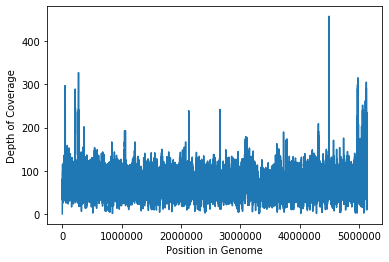

In [32]:
x_index = []
y_value = []
counter = 0
with open("output_data/pileup.tab", "r") as f:
    for line in f.readlines():
        line = line.split("\t")
        x_index.append(counter)
        y_value.append(int(line[2]))
        counter += 1

import matplotlib.pyplot as plt

plt.plot(x_index, y_value)
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.show()

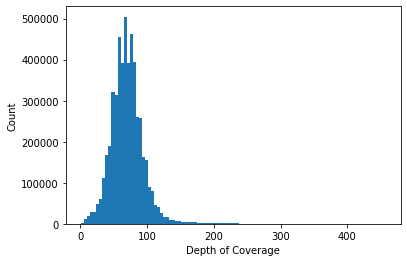

In [13]:
plt.hist(y_value, bins=100)
plt.ylabel('Count')
plt.xlabel('Depth of Coverage')
plt.show()

## Extra Credit 1


`cat data/mixed_reads1.fastq data/mixed_reads2.fastq > data/mixed_reads.fastq`

`bowtie2 -p 4 --very-sensitive --no-unal -x data/hg19 -U data/mixed_reads.fastq -S output_data/human_aligned_mixed_reads.sam --un output_data/human_unaligned_mixed_reads.fastq`  
This took a long time!  
Output  
`2570882 reads; of these:`  
`  2570882 (100.00%) were unpaired; of these:`  
`    2056869 (80.01%) aligned 0 times`  
`   465069 (18.09%) aligned exactly 1 time`  
`    48944 (1.90%) aligned >1 times`  
`19.99% overall alignment rate`  

`mv output_data/human_aligned_mixed_reads.sam ec1/human_aligned_mixed_reads.sam`

`samtools view –b ec1/human_aligned_mixed_reads.sam > ec1/human_aligned_mixed_reads.bam`

`samtools sort ec1/human_aligned_mixed_reads.bam > ec1/human_aligned_mixed_reads.sorted.bam`  

`samtools index ec1/human_aligned_mixed_reads.sorted.bam`  

`samtools depth -a ec1/human_aligned_mixed_reads.sorted.bam > ec1/pileup.tab`  

In [22]:
xec1 = []
yec1 = []
temp_yec1 = []
current_chromosome = ''
with open("ec1/pileup.tab", "r") as f:
    for line in f:
        line = line.strip().split("\t")
        if current_chromosome != line[0]:
            xec1.append(line[0])
            if current_chromosome:
                yec1.append(sum(temp_yec1)/len(temp_yec1))
                temp_yec1 = []
            else:
                try:
                    temp_yec1.append(int(line[2]))
                except:
                    current_chromosome = "memory error"
            current_chromosome = line[0]
        else:
            try:
                temp_yec1.append(int(line[2]))
            except:
                current_chromosome = "memory error"

In [26]:
yec1.append(sum(temp_yec1)/len(temp_yec1))

['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chr1_gl000191_random', 'chr1_gl000192_random', 'chr4_gl000193_random', 'chr4_gl000194_random', 'chr9_gl000199_random', 'chrUn_gl000214', 'chrUn_gl000219', 'chrUn_gl000221', 'chrUn_gl000222', 'chrUn_gl000225', 'chrUn_gl000226', 'chrUn_gl000227', 'chrUn_gl000228', 'chrUn_gl000233', 'chrUn_gl000243', 'chrUn_gl000245', 'chrUn_gl000247'] [0.19067335844270575, 0.191000291727727, 0.19086039491011395, 0.11489084928914094, 0.00028476315532898193, 0.0002019284497134811, 0.00016332926061675697, 0.00018984856941037443, 0.00017518871965648027, 0.00014619129474002188, 0.0001790358043091476, 0.00015922075783253393, 0.0001189199846067388, 9.9842068255179e-05, 0.00016299398493481866, 0.00015849747448811548, 0.00015662254160833552, 0.0001334063430796939, 0.00018637222605997174, 0.00011663529498265615

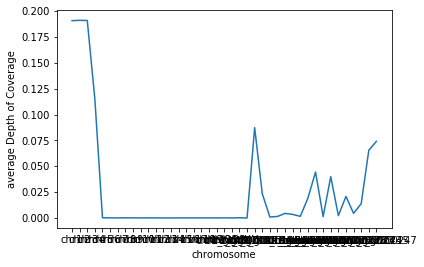

In [27]:
print(xec1, yec1)
plt.plot(xec1, yec1)
plt.xlabel("chromosome")
plt.ylabel("average Depth of Coverage")
plt.show()

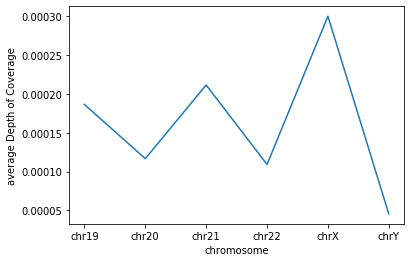

In [30]:
plt.plot(xec1[18:24], yec1[18:24])
plt.xlabel("chromosome")
plt.ylabel("average Depth of Coverage")
plt.show()

Considering that there are almost no matches for chromosome y, I think that Jamie is a biological female (i.e. has only two X chromosomes). This is paired with the fact that the average depth for chrX is twice the average of nearby chromosomes 19 to 22.

## Extra Credit 2

### 'zoom zoom' - bolt 2008

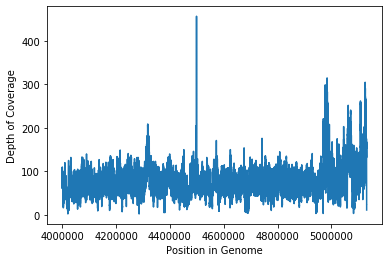

In [34]:
plt.plot(x_index[4000000:], y_value[4000000:])
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.show()

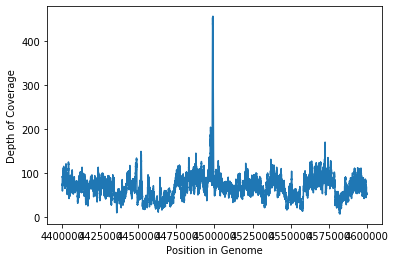

In [35]:
plt.plot(x_index[4400000:4600000], y_value[4400000:4600000])
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.show()

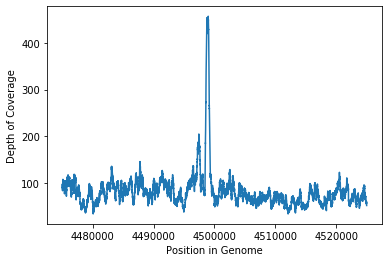

In [36]:
plt.plot(x_index[4475000:4525000], y_value[4475000:4525000])
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.show()

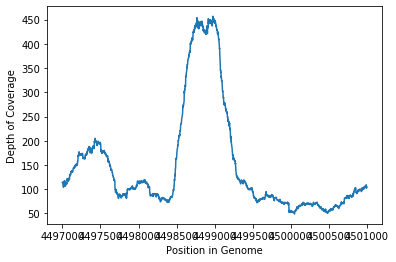

In [37]:
plt.plot(x_index[4497000:4501000], y_value[4497000:4501000])
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.show()

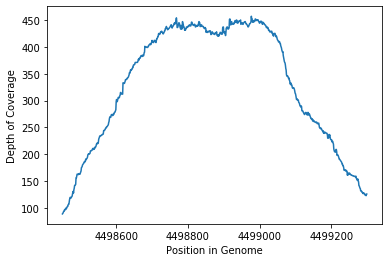

In [39]:
plt.plot(x_index[4498450:4499300], y_value[4498450:4499300])
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.show()

I'm going to BLAST the genome from position 4498750 to 4499000.

First, some commands to get my fasta format and therefore sequence:  
`bowtie2-inspect data/shewanella_oneidensis_mr-1 > s_oneidensis_genome.fasta`  

In [41]:
char_count = 0
line_count = 0
sequence = []
with open("s_oneidensis_genome.fasta", "r") as f:
    for line in f.readlines():
        line = line.strip()
        if line_count == 0:
            line_count+=1
            continue
        for char in line:
            if 4498750 <= char_count <= 4499000:
                sequence.append(char)
            char_count+=1
        line_count+=1
blast_sequence = ''.join(sequence)

In [43]:
blast_sequence

'GCGAGACCAGCGAGGTCACCTTCACCTTCAGCGAGAAGGTCAAAGACTTCGAAGTGGGCGACCTGACCGTGGTGGGCGGCACTGTTACCGACCTCAAGACCACCGACGGCGGCAAGACCTGGACCGGGACCTTCACGCCGACCCCAGGCTTCACTGGCACCGCCAGCGTCACCGTGAACAACGGCAGCTACACCGATCTCAACGGCAACGTGGGCACCGGCGGCCAGGACACTGCGCCGGTCGACACCCAG'

#### This sequence is a part of 'biofilm-promoting protein BpfA'.